# EDA & data cleaning & data preprocess

In [44]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt


### Mount google drive

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import dataset

In [46]:
df =  pd.read_csv('/content/drive/MyDrive/topic extraction/data/stories.csv')

In [47]:
# df =  pd.read_csv(r'D:/______________projects/topic/data/stories.csv')

### check dataset and have idea about it

In [48]:
df.head()

,body,topic
0,,['39822b5f-e37e-43e8-b997-7142fe55c3ea']
1,,['0d817400-3f5d-41e0-929c-c31fdbe75d31']
2,,['83a09c6b-5f2f-421f-ae50-b38acca7e008']
3,,['6fbf954a-03f9-4782-a65f-783271c9c447']
4,hello and welcome to BBC News a woman who gave...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."


In [49]:
df.tail()

,body,topic
5176,News. More local help will soon be on the way....,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9632..."
5177,"with March 1, we start what is called Meteorol...",['9a06646a-e1df-4fca-888e-69658420556b']
5178,overseas. A massive Russian convoy is headed t...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
5179,"And this morning, the National Hockey League s...","['9ff54ded-904b-4e0c-85ce-a3617f5cb913', 'b492..."
5180,"thank you very much. Also this morning, the Un...","['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."


### put nan values instead of white space 

In [50]:
import re
import numpy as np

df = df.replace(r'^\s*$', np.nan, regex=True)


In [51]:
df.describe()

,body,topic
count,5152,5181
unique,5141,178
top,shift.,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
freq,5,883


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    5152 non-null   object
 1   topic   5181 non-null   object
dtypes: object(2)
memory usage: 81.1+ KB


### drop NAN values

In [53]:
df[df.isnull().any(axis=1)]

,body,topic
0,NaN,['39822b5f-e37e-43e8-b997-7142fe55c3ea']
1,NaN,['0d817400-3f5d-41e0-929c-c31fdbe75d31']
2,NaN,['83a09c6b-5f2f-421f-ae50-b38acca7e008']
3,NaN,['6fbf954a-03f9-4782-a65f-783271c9c447']
5,NaN,['83a09c6b-5f2f-421f-ae50-b38acca7e008']
6,NaN,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
7,NaN,"['ca197b81-ca86-4792-8c25-2ba7cd4195b5', '83a0..."
9,NaN,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', 'ebf2..."
10,NaN,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9a06..."
13,NaN,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."


In [54]:
df = df.dropna()


### find duplicated rows to remove them

In [55]:
df['body'].duplicated().sum()


11

In [56]:
df[df['body'].duplicated()]

,body,topic
150,their.,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
185,shift.,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '74e2..."
186,their.,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
191,shift.,"['96326734-fd82-4350-b45c-513e7eb9147c', '6fbf..."
203,shift.,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
244,their.,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."
1717,"all of that. You see, there's a ton of gear he...","['74e2fab8-689f-4e17-9a1c-e1f92e084f55', 'b492..."
2419,President Biden says he will invest more in th...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
2459,shift.,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9632..."
3534,for joining us. We begin tonight on the Penins...,['83a09c6b-5f2f-421f-ae50-b38acca7e008']


In [57]:
df = df.drop_duplicates(subset=['body'])

In [58]:
df.head()

,body,topic
4,hello and welcome to BBC News a woman who gave...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."
8,news now out of North Hollywood. A 14 yearold ...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
11,homelessness his city's greatest failure. That...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '74e2..."
12,Minneapolis police officer Kim Potter guilty o...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."
15,Judy an update now to the wildfires that wiped...,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9a06..."


In [59]:
df.tail()

,body,topic
5176,News. More local help will soon be on the way....,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9632..."
5177,"with March 1, we start what is called Meteorol...",['9a06646a-e1df-4fca-888e-69658420556b']
5178,overseas. A massive Russian convoy is headed t...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
5179,"And this morning, the National Hockey League s...","['9ff54ded-904b-4e0c-85ce-a3617f5cb913', 'b492..."
5180,"thank you very much. Also this morning, the Un...","['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."


In [60]:
df[df['body'].isnull()]

,body,topic


In [61]:
df = df.reset_index(drop=True)

In [62]:
df

,body,topic
0,hello and welcome to BBC News a woman who gave...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."
1,news now out of North Hollywood. A 14 yearold ...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
2,homelessness his city's greatest failure. That...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '74e2..."
3,Minneapolis police officer Kim Potter guilty o...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5..."
4,Judy an update now to the wildfires that wiped...,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9a06..."
...,...,...
5136,News. More local help will soon be on the way....,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9632..."
5137,"with March 1, we start what is called Meteorol...",['9a06646a-e1df-4fca-888e-69658420556b']
5138,overseas. A massive Russian convoy is headed t...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913']
5139,"And this morning, the National Hockey League s...","['9ff54ded-904b-4e0c-85ce-a3617f5cb913', 'b492..."


In [63]:
df_story = df.copy()

### generate WordCloud before preprocessing and cleaning data 

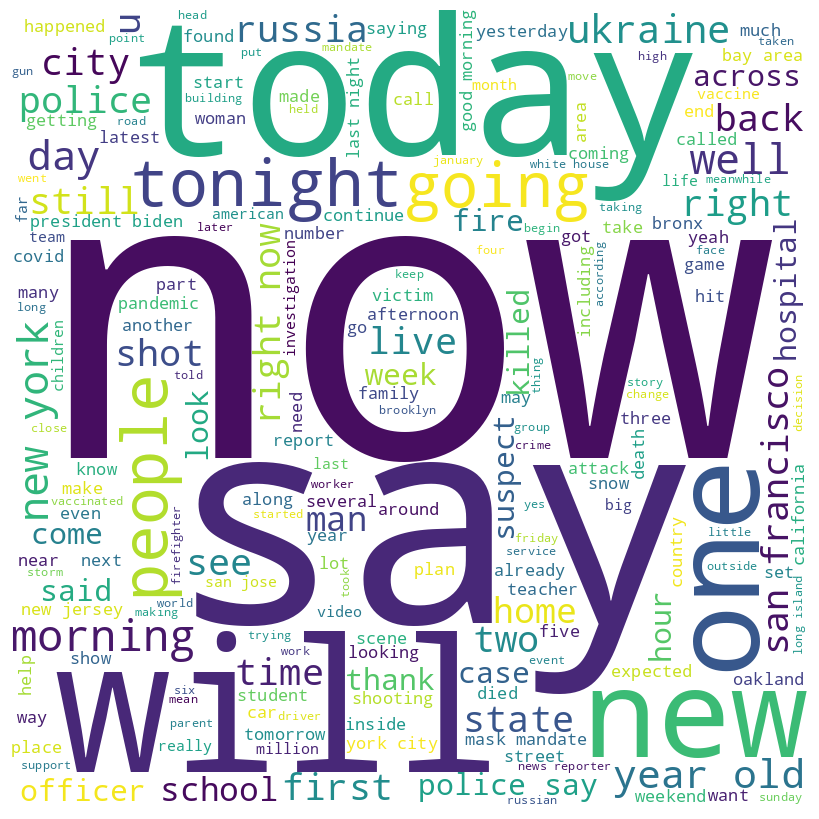

In [64]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.body:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

plt.style.use('ggplot')
# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### module to prepocess and clean text

In [65]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
  
    # Lowercasing
    text = text.lower()

    # remove non English words
    text = re.sub(r'[^\x00-\x7f]',r'', text) 

    # remove letters that occur more than 2 times
    text = re.sub(r'(\w)\1{2,}', r'\1',text)

    # Removing more than one spaces
    text = re.sub(r'[\s]{2,}', ' ', text)

    # Removing punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # remove tags and mentions
    text = re.sub(r'@\S*','',text)
    text = re.sub(r'#\S*','',text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing numbers
    tokens = [re.sub(r'\d+', '', token) for token in tokens]

    # Removing URLs
    tokens = [re.sub(r'http\S+|www.\S+', '', token) for token in tokens]

    # Removing empty tokens
    tokens = [token for token in tokens if token]

    # Joining the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage
text = "This is an example sentence with numbers like 123 and   a URL like https://example.com for  یسی running you should use your sneakers سلام خوبیم. hiii "
preprocessed_text = preprocess_text(text)
print(preprocessed_text)


example sentence number like url like running use sneaker hi


In [67]:
df_story['cleaned'] = df_story['body'].apply(lambda t: preprocess_text(t))
df_story

,body,topic,cleaned
0,hello and welcome to BBC News a woman who gave...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5...",hello welcome bbc news woman gave key evidence...
1,news now out of North Hollywood. A 14 yearold ...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913'],news north hollywood yearold girl found dead i...
2,homelessness his city's greatest failure. That...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '74e2...",homelessness city greatest failure message ton...
3,Minneapolis police officer Kim Potter guilty o...,"['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff5...",minneapolis police officer kim potter guilty d...
4,Judy an update now to the wildfires that wiped...,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9a06...",judy update wildfire wiped entire neighborhood...
...,...,...,...
5136,News. More local help will soon be on the way....,"['9ff54ded-904b-4e0c-85ce-a3617f5cb913', '9632...",news local help soon way group volunteer yonke...
5137,"with March 1, we start what is called Meteorol...",['9a06646a-e1df-4fca-888e-69658420556b'],march start called meteorological spring keep ...
5138,overseas. A massive Russian convoy is headed t...,['9ff54ded-904b-4e0c-85ce-a3617f5cb913'],overseas massive russian convoy headed toward ...
5139,"And this morning, the National Hockey League s...","['9ff54ded-904b-4e0c-85ce-a3617f5cb913', 'b492...",morning national hockey league say suspending ...


In [68]:
df_story.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   body     5141 non-null   object
 1   topic    5141 non-null   object
 2   cleaned  5141 non-null   object
dtypes: object(3)
memory usage: 120.6+ KB


### generate WordCloud after preprocessing and cleaning data 

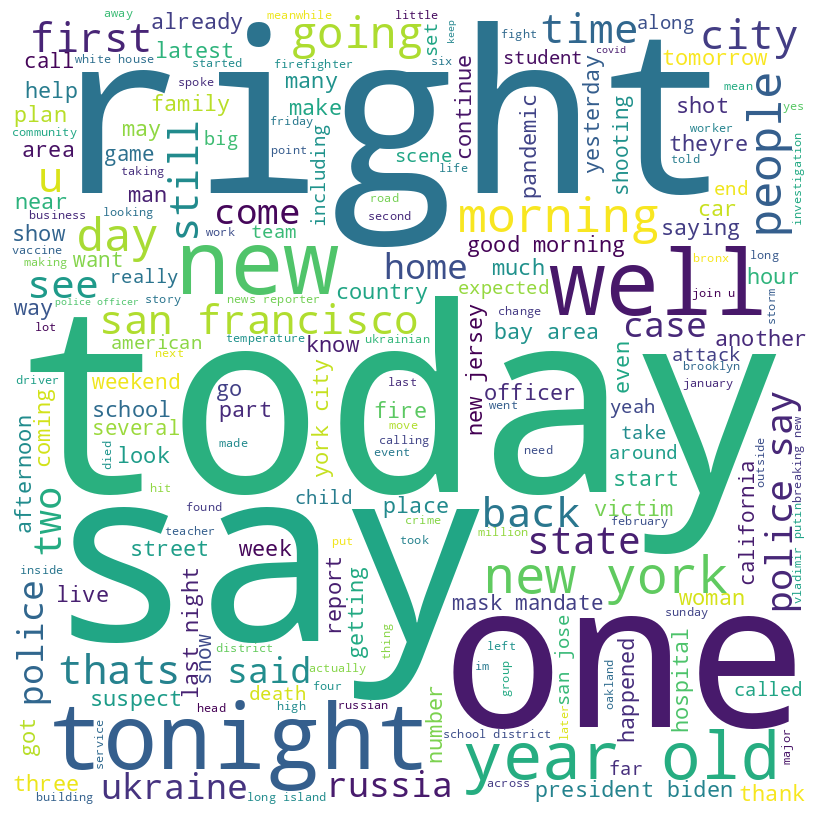

In [69]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_story.cleaned:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### save data frame to use it in our model

In [70]:
df_story.to_csv('/content/drive/MyDrive/topic extraction/data/stories_cleaned_tokenized.csv', index=False)
